
**Vivacomet** Notebook simulates the environment and growth of organisms within it. The environment is represented as a grid, where each bin contains specific amounts of various molecules that organisms in that bin can utilize. The simulation takes into account the diffusion and advection of molecules, as well as the biomass of species. Additionally, Vivacomet simulates the growth of organisms in each bin, which is influenced by the availability of molecules in that bin.

In [7]:
#imports
import numpy as np
from processes.diffusion_field import DiffusionField
from processes.spatial_dfba import SpatialDFBA
from plots.field import plot_objective_flux, plot_fields_temporal
from vivarium.core.engine import Engine
import base64
import shutil
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import imageio
import os
import io

In [2]:
#config

comets_config = {
    'total_time':200 ,
    'bounds': [5, 5],
    'nbins': [2, 2],
}

# Parameters shared by both processes
shared_params = {
    'bounds': comets_config['bounds'],
    'nbins': comets_config['nbins'],
    'molecules': ['glucose', 'oxygen'],
}

species_info = [
    {
        "name": "Alteromonas",
        "model": '../data/Alteromonas_Model.xml',
        "flux_id_map": {
            "glucose": "EX_cpd00027_e0",
            "oxygen": "EX_cpd00007_e0"
        },
        "kinetic_params": {
            "glucose": (0.5, 0.0005),
            "oxygen": (0.3, 0.0005),
        },
        "fixed_bounds": {
            'EX_cpd00149_e0': (-100, 1000)
        }
    },
    {
        "name": "ecoli",
        "model": '../data/iECW_1372.xml',
        "flux_id_map": {
            "glucose": "EX_glc__D_e",
            "oxygen": "EX_o2_e"
        },
        "kinetic_params": {
            "glucose": (0.4, 0.6),
            "oxygen": (0.25, 0.6),
        },
        "fixed_bounds": {
            'EX_fe3dhbzs_e': (-1000, 1000)
        }
    }
]

# Specific parameters for Diffusion Field
diffusion_field_params = {
    **shared_params,
    'default_diffusion_dt': 0.001,
    'default_diffusion_rate': 2E-5,
    'diffusion': {
        'glucose': 6.7E-1,
        'oxygen': 2.0E-2,
    },
    'advection': {
        'glucose': (0.01, 0.02),
        'oxygen': (0.01, 0.01),
    }
}

# Specific parameters for Spatial DFBA
spatial_dfba_params = {
    **shared_params,
    'species_info': species_info
}

initial_state_config = {
    'random': {
        'glucose': 200.0,  # Max random value for glucose
        'oxygen': 200.0,   # Max random value for oxygen
        'species': {
            'ecoli': 0.5,   # Max random value for E. coli biomass
            'Alteromonas': 0.5   # Max random value for Alteromonas biomass
        }
    }
}


In [10]:
comets_config["total_time"]


200

In [3]:
# create the two processes
diffusion_field = DiffusionField(parameters=diffusion_field_params)
spatial_dfba = SpatialDFBA(parameters=spatial_dfba_params)

# set the initial state for diffusion field
initial_state_diffusion_field = diffusion_field.initial_state({'random': 1.0})

# set the initial state for spatial dfba
initial_state_spatial_dfba = spatial_dfba.initial_state(initial_state_config)

# Merge the initial states
initial_state = {
    'fields': initial_state_diffusion_field['fields'],
    'species': initial_state_spatial_dfba['species'],
}

# make the composite simulation and run it
sim = Engine(
    processes={
        'diffusion_process': diffusion_field,
        'fba_process': spatial_dfba
    },
    topology={
        'diffusion_process': {
            'fields': ('fields',),
            'species': ('species',),
            'dimensions': ('dimensions',),
        },
        'fba_process': {
            'fields': ('fields',),
            'species': ('species',),
            'exchange_fluxes': ('exchange_fluxes',),
            'dimensions': ('dimensions',),
        }
    },
    initial_state=initial_state
)
sim.update(comets_config['total_time'])

# retrieve the results and plot them
data = sim.emitter.get_timeseries()
desired_time_points = [1, 3, comets_config['total_time'] - 1]

ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Loaded model for Alteromonas
Loaded model for ecoli

Simulation ID: b9dbd4e6-2a75-11ef-9aaa-ba21c95c07d9
Created: 06/14/2024 at 13:44:18


/Users/amin/Desktop/VivaComet/myenv/lib/python3.11/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/amin/Desktop/VivaComet/myenv/lib/python3.11/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/amin/Desktop/VivaComet/myenv/lib/python3.11/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/amin/Desktop/VivaComet/myenv/lib/python3.11/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/amin/Desktop/VivaComet/myenv/lib/python3.11/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/amin/Desktop/VivaComet/myenv/lib/python3.11/site-pack

Completed in 106.78 seconds


/var/folders/wc/w8xfpkvd1gq1szrqlrsy0cy40000gn/T/ipykernel_34931/3783576488.py:58: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(buf))
/var/folders/wc/w8xfpkvd1gq1szrqlrsy0cy40000gn/T/ipykernel_34931/3783576488.py:104: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(buf))
/var/folders/wc/w8xfpkvd1gq1szrqlrsy0cy40000gn/T/ipykernel_34931/3783576488.py:115: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) u


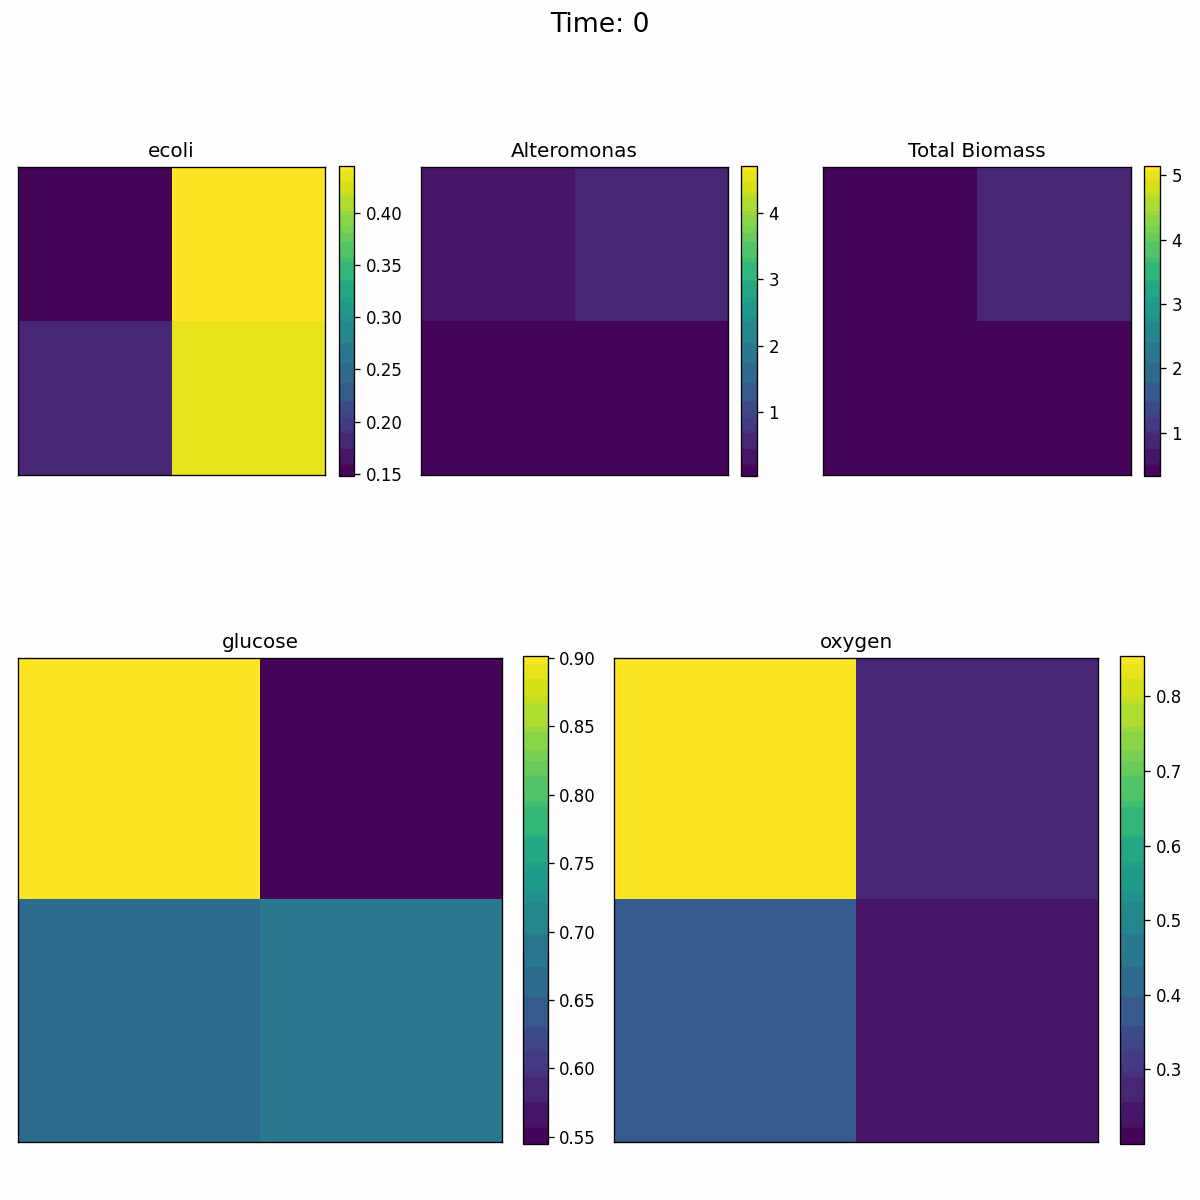

In [11]:

total_time=comets_config["total_time"]
def plot_objective_flux_to_gif(data, total_time, species_names, temp_dir):
    available_time_points = data["time"]
    valid_time_points = list(range(total_time + 1))

    num_species = len(species_names)
    num_times = len(valid_time_points)
    images = []

    # Calculate global min and max for each species and total biomass
    global_min = [np.inf] * (num_species + 1)  # +1 for total biomass
    global_max = [-np.inf] * (num_species + 1)

    # Precompute global min/max for species and total biomass
    for time in valid_time_points:
        time_index = data["time"].index(time)
        total_biomass = np.zeros_like(data["species"][species_names[0]][time_index])

        for j, species_id in enumerate(species_names):
            current_species = data["species"][species_id][time_index]
            total_biomass += current_species
            global_min[j] = min(global_min[j], np.min(current_species))
            global_max[j] = max(global_max[j], np.max(current_species))

        # Update total biomass global min and max
        global_min[-1] = min(global_min[-1], np.min(total_biomass))
        global_max[-1] = max(global_max[-1], np.max(total_biomass))

    # Plotting each species and total biomass for each time
    for time in valid_time_points:
        time_index = data["time"].index(time)
        total_biomass = np.zeros_like(data["species"][species_names[0]][time_index])
        fig, axs = plt.subplots(1, num_species + 1, figsize=(num_species * 5, 5), squeeze=False)

        for j, species_id in enumerate(species_names):
            current_species = data["species"][species_id][time_index]
            total_biomass += current_species
            im = axs[0, j].imshow(current_species, cmap='viridis', vmin=global_min[j], vmax=global_max[j])
            axs[0, j].set_title(species_id)
            axs[0, j].set_xticks([])
            axs[0, j].set_yticks([])
            plt.colorbar(im, ax=axs[0, j], fraction=0.046, pad=0.04)

        # Plot total biomass in the last column
        im = axs[0, -1].imshow(total_biomass, cmap='viridis', vmin=global_min[-1], vmax=global_max[-1])
        axs[0, -1].set_title("Total Biomass")
        axs[0, -1].set_xticks([])
        axs[0, -1].set_yticks([])
        plt.colorbar(im, ax=axs[0, -1], fraction=0.046, pad=0.04)

        # Add the current time as text
        plt.suptitle(f'Time: {time}', fontsize=16)

        plt.tight_layout()
        buf = io.BytesIO()
        plt.savefig(buf, format='png', dpi=120)
        buf.seek(0)
        images.append(imageio.imread(buf))
        buf.close()
        plt.close(fig)

    # Save images to temporary directory
    for i, img in enumerate(images):
        imageio.imwrite(os.path.join(temp_dir, f'obj_flux_{i}.png'), img)

def plot_molecules_to_gif(data, total_time, molecule_names, temp_dir):
    available_time_points = data["time"]
    valid_time_points = list(range(total_time + 1))

    num_molecules = len(molecule_names)
    num_times = len(valid_time_points)
    images = []

    # Calculate global min and max for each molecule
    global_min = [np.inf] * num_molecules
    global_max = [-np.inf] * num_molecules

    # Precompute global min/max for molecule concentrations
    for time in valid_time_points:
        time_index = data["time"].index(time)

        for j, molecule_id in enumerate(molecule_names):
            current_molecule = data["fields"][molecule_id][time_index]
            global_min[j] = min(global_min[j], np.min(current_molecule))
            global_max[j] = max(global_max[j], np.max(current_molecule))

    # Plotting each molecule concentration for each time
    for time in valid_time_points:
        time_index = data["time"].index(time)
        fig, axs = plt.subplots(1, num_molecules, figsize=(num_molecules * 5, 5), squeeze=False)

        for j, molecule_id in enumerate(molecule_names):
            current_molecule = data["fields"][molecule_id][time_index]
            im = axs[0, j].imshow(current_molecule, cmap='viridis', vmin=global_min[j], vmax=global_max[j])
            axs[0, j].set_title(molecule_id)
            axs[0, j].set_xticks([])
            axs[0, j].set_yticks([])
            plt.colorbar(im, ax=axs[0, j], fraction=0.046, pad=0.04)

        plt.tight_layout()
        buf = io.BytesIO()
        plt.savefig(buf, format='png', dpi=120)
        buf.seek(0)
        images.append(imageio.imread(buf))
        buf.close()
        plt.close(fig)

    # Save images to temporary directory
    for i, img in enumerate(images):
        imageio.imwrite(os.path.join(temp_dir, f'molecule_{i}.png'), img)

def combine_gifs(output_filename, temp_dir, num_images):
    combined_images = []
    for i in range(num_images):
        obj_flux_img = imageio.imread(os.path.join(temp_dir, f'obj_flux_{i}.png'))
        molecule_img = imageio.imread(os.path.join(temp_dir, f'molecule_{i}.png'))
        
        combined_img = np.vstack((obj_flux_img, molecule_img))
        combined_images.append(combined_img)

    imageio.mimsave(output_filename, combined_images, duration=0.5, loop=0)

    # Optionally display the GIF in a Jupyter notebook
    with open(output_filename, 'rb') as file:
        data = file.read()
        data_url = 'data:image/gif;base64,' + base64.b64encode(data).decode()
    display(HTML(f'<img src="{data_url}" alt="Combined GIF" style="max-width:100%;"/>'))

# Create a temporary directory
temp_dir = 'temp_images'
os.makedirs(temp_dir, exist_ok=True)

# Generate images
plot_objective_flux_to_gif(data, total_time=200, species_names=['ecoli', 'Alteromonas'], temp_dir=temp_dir)
plot_molecules_to_gif(data, total_time=200, molecule_names=['glucose', 'oxygen'], temp_dir=temp_dir)

# Combine GIFs
combine_gifs('combined_over_time.gif', temp_dir, total_time + 1)

# Clean up temporary directory
shutil.rmtree(temp_dir)
